<a href="https://colab.research.google.com/github/muscak/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this study is to learn about simple linear regression using Stats Model package. It's mainly based on the data and code of "The Data Science Course 2022: Complete Data Science Bootcamp" in Udemy. 

In [ ]:
import pandas as pd             # Allows us to organize data in a tabular form and to attach descriptive labels to the rows and columns.
import numpy as np              # A third party package allowing us to work with multi-dimensional arryas.
import matplotlib.pyplot as plt # A 2D plotting library especially designed for visualization of NumPy computaions.
import statsmodels.api as sm    # A package built on top of NumPy and Scipy (mathematics, machine learning etc.) which integrates with Pandas.

# Libraries to connect a data file in the google drive to create the model on Google Colab.
# While working on local computer no need for these libraries. 
from google.colab import files
from google.colab import drive

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/gdrive') # While working on local computer no need for this function. 

# Special function to read and parse a .csv file and parse it. To see the structure type: pd.read_csv?
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Linear Regression/Data/1.01.+Simple+linear+regression.csv')

Mounted at /content/gdrive


In [ ]:
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [ ]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


As `describe()` method shows we have 84 observations of SAT scores which includes critical reading, mathematics and writing and GPA (Grade Point Average) which is a score that you get at graduation from universtiy.

We'll create a linear regression which predicts GPA based on the SAT score obtained. Why we do that?
1. The SAT is considered one of the best estimators of intellectual capacity and capability.
2. Almost all college across the USA are using SAT as a proxy for admission.





##Creating the regression

$\hat{y}= b_0 + b_1.x_1$ \

We'll find the $b_0$ and $b_1$ which can predict the GPA using the given STA as correct as possible.

In [ ]:
y = df['GPA']   # Dependent variable
x1 = df['SAT']  # Independent variable

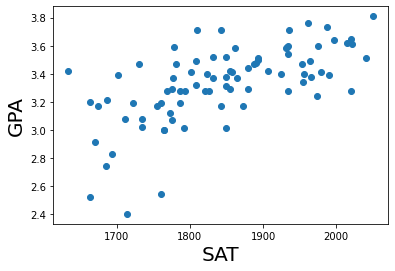

In [ ]:
# Plot the relation between GPA and SAT
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

Adding a constant since it's practical for computational purposes.
<br>
$\hat{y}= b_0.1 + b_1.x_1$

In [ ]:
x = sm.add_constant(x1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Fit function will apply a specific estimation technique, *OLS (Ordinary Least Squares)*, to obtain the fit of the model.
<br><br>
Lower error => better explanatory power<br>
Lowest error => BEST explanatory power

OLS tries to minimize SSE (Sum of the Squared Errors)
<br><br>
$min \sum_{i=1}^ne_i^2$
<br><br>
$S(b) = \sum_{i=1}^n(y_i - x_i^Tb)^2 = (y-Xb)^T.(y-Xb)$



In [ ]:
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           7.20e-11
Time:                        12:08:43   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Interpretation of the regression table
`results.summary()` creates 3 tables:
1. Model summary table
2. A coefficients table
3. Some additional test

$b_0$ is `coef` value of `const` in the coefficient table. $b_1$ is `coef` value of `SAT`. Coefficient, constant and bias are used interchangeably. 
<br><br>
$b_0$ = 0.2750 <br>
$b_1$ = 0.0017 <br>


$\hat{y}= 0.275 + 0.0017.x_1$
<br>
GPA = 0.275 + 0.0017.SAT

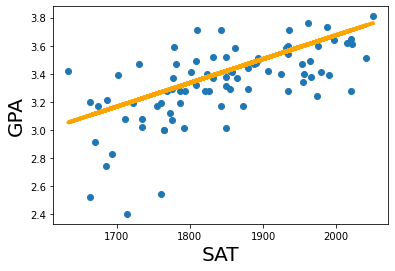

In [ ]:
# Plot the regression line which is graphically, the one closest to all points simultaneously.
plt.scatter(x1, y)
yhat = 0.0017*x1 + 0.275 # Regression line
fig = plt.plot(x1, yhat, lw=4, c='orange', label='Regression Line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

Is this a useful variable? Does it help us explain the variability we have in this case?\
To answer these questions, we need look at the `P` value. A p-value which is less than 0.05, means that the variable is significant. Also, having 0.000 p-value for SAT shows that it's a significant variable when predicting GPA.

###R-sqaured
There are 3 terms need to be defined before looking into R-squared:
1. **Sum of Squares Total (SST):** Also known as Total Sum of Squares (TSS).It's the observed square differences between the observed dependent variable and it's mean. It's the dispertion of the observed variables around the mean. <ins>Measures the total variablity of the dataset.</ins>
<br><br>
$\sum_{i=1}^n(y_i - \overline{y})^2$
2. **Sum of Squares Regression (SSR)**: Also known as Explain Sum of Squares (ESS). It's the sum of differences between the predicted value and the mean of the dependent variable. It's a measure that describes how well your line fits the data. <ins>Measures the explained variabilty by your line.</ins>
<br><br>
$\sum_{i=1}^n(\hat{y} - \overline{y})^2$
<br><br>
SSE = SST => The regression model captures all the observed variability and it's perfect.

3. **Sum of Squares Error (SSE)**: Also known as Residual (remaining or unexplained) Sum of Squares (RSS). It's the difference between observed value and the predicted value. <ins>Measures the unexplained variability by regression.</ins> The lower error, the better explanatory power of the regression.
<br><br>
$\sum_{i=1}^ne_i^2$
<br><br>
$SST = SSR + SST$: The total variability of the dataset is eqaul to the variablity explained by the regression line, plus the unexplained variability known as error.
<br><br>
**R-squared**: A widely user measure that descibes how powerful a regression is. It's a relative measure adn takes values ranging from 0 to 1 and R squared of 0 means your regression line explains non of the variability of the data. 1 means your model explains the entire variability of the data.
<br><br>
$R^2 = \frac{SSR}{SST}$

Other methods can be used:


* Generalized Least Squares
* Maximum Likelihood Estimation
* Bayesian Regression
* Kernel Regression
* Gaussian Process Regression

